## This Notebook is for replicating large portions of the original CATALYST paper

NOTE: "Replicate" Her means to get similar results and figures from the same data, not exact replication.
PalmettoBUG's Analysis class was intentionally designed to mimic CATALYST, so the results should be largel similar in both biological outputs and appearance.

Original CATALYST paper: "CyTOF workflow: differential discovery in high-throughput high-dimensional cytometry datasets" Nowicka et. al., 2019 https://doi.org/10.12688/f1000research.11622.3

Data source: http://flowrepository.org/public_experiment_representations/1704 -- only the PBMC Reference / BCR-XL FCS data files used
(directed here by the HDCytoData package: https://github.com/lmweber/HDCytoData)

    This is data originally from the following paper: "Multiplexed mass cytometry profiling of cellular states perturbed by small-molecule regulators" Bodenmiller et. al.,  (2012) https://doi.org/10.1038/nbt.2317. It's data was originally released publicly through a CytoBank experiment, but has been re-used in various other papers, such as the CATALYST paper and by the HDCytoData paper / package.

In [1]:
import os
import time
import numpy as np
import pandas as pd

start = time.time()
import palmettobug as pbug

The PalmettoBUG package is copyrighted 2024-2025 by the Medical University of South Carolina and licensed under the GPL-3 license.
It is free & open source software, can  be redistributed in compliance with the GPL3 license, and comes with absolutely no warranty.
In python, use palmettobug.print_license() to see the license, or use palmettobug.print_3rd_party_license_info() to print information
about the licenses and copyright of 3rd party software used in PalmettoBUG itself or in the creation of PalmettoBUG.


In [2]:
data_directory = "C:/Users/Default/Desktop/CyTOF_data"

In [7]:
####### This cell contains one-time-use code utilized to generate the panel & metadata .csv files --- need to add / consider a better way of doing this 
            ## creation of panel / metadata csv's outside the GUI! 
## Used to re-create the metadata (condition, patient_id), and panel infomation (type, state, none) marker classes from the original CATALYST paper

#import tkinter as tk
#app = tk.Tk()
#pbug.ImageProcessing.ImageAnalysisClass.direct_to_Analysis(app, data_directory)
#tk.mainloop()

In [ ]:
'''Warning! metadata file manually edited (& filenames) to try to re-order conditions to be ordered Reference / BCR-XL
This appears to have created an error in the conditions / downstream functions!

CURRENTLY there are likey INACCURACIES in the figures in this notebook! Need to be fixed
'''

In [271]:
Experiment = pbug.Analysis()
Experiment.load_data(data_directory + "/main")

Could not load regionprops data, presuming this is a solution-mode dataset -- Spatial analyses will not be possible.


In [277]:
Experiment.metadata

,file_name,sample_id,patient_id,condition,number_of_cells
0,PBMC8_30min_apatient1_Reference.fcs,0,1,Reference,2739
1,PBMC8_30min_apatient2_Reference.fcs,1,2,Reference,16725
2,PBMC8_30min_apatient3_Reference.fcs,2,3,Reference,9434
3,PBMC8_30min_apatient4_Reference.fcs,3,4,Reference,6906
4,PBMC8_30min_apatient5_Reference.fcs,4,5,Reference,11962
5,PBMC8_30min_apatient6_Reference.fcs,5,6,Reference,11038
6,PBMC8_30min_apatient7_Reference.fcs,6,7,Reference,15974
7,PBMC8_30min_apatient8_Reference.fcs,7,8,Reference,13670
8,PBMC8_30min_patient1_BCR-XL.fcs,8,1,BCR-XL,2838
9,PBMC8_30min_patient2_BCR-XL.fcs,9,2,BCR-XL,16675


In [272]:
## filter 'none' columns out -- original CATALYST paper does not use these at all in the main figures of the paper, as far as I can tell
Experiment.panel = Experiment.panel[Experiment.data.var['marker_class'] != 'none']
Experiment.data = Experiment.data[:,Experiment.data.var['marker_class'] != 'none']

In [273]:
## scale data

## for some reason, this data contains negative values (this should not be possible...unless some transformation has been performed on it?)
Experiment.data.X = Experiment.data.X - Experiment.data.X.min(axis = 0)

Experiment.do_scaling('%quantile',99.9)

In [274]:
## NOTE! PalmettoBUG enforces an ordering of the samples & conditions by alphabetical / python-sort order
# If all reference samples should be first, followed by the BCR-XL samples (like in the originalk CATALYST paper)
# then the files (and their corresponding entry in the metadata.csv file) should be re-named to be in that order.
# I may do this transformation at a later point to make the outputs match CATALYST more closely.

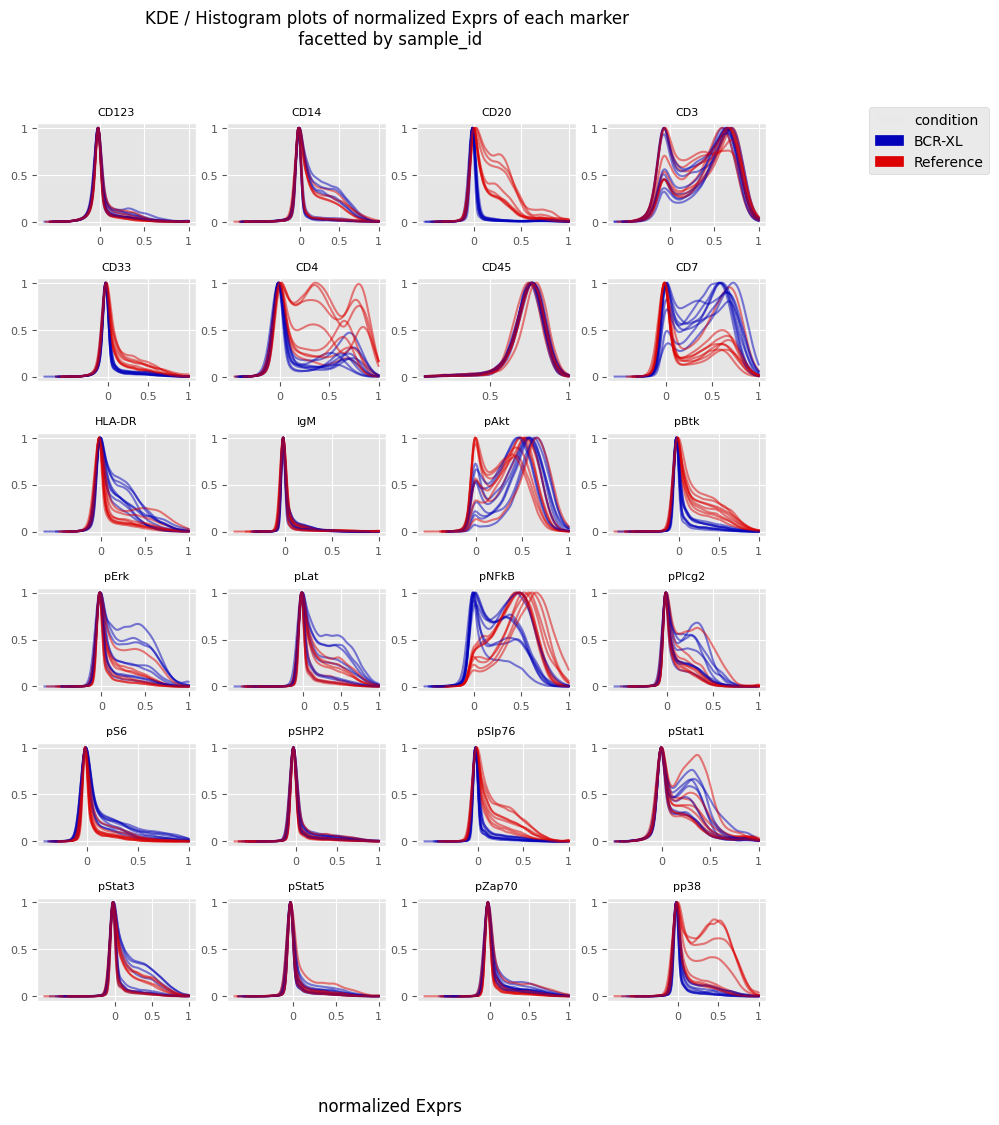

In [208]:
Experiment.plot_ROI_histograms(color_by = 'condition')

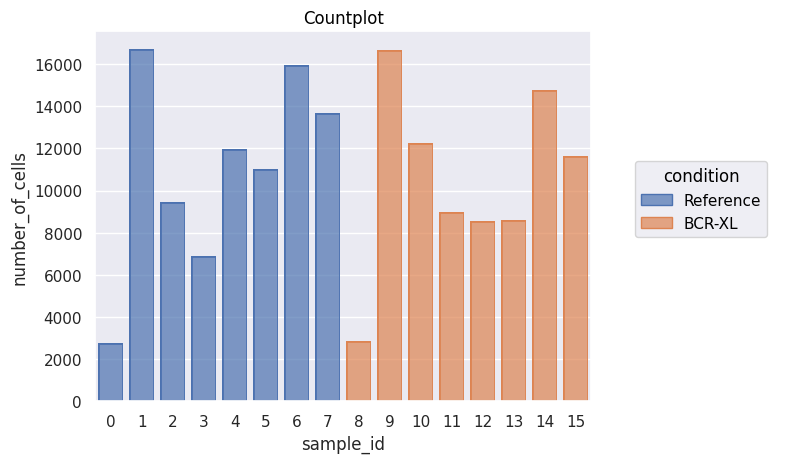

In [275]:
Experiment.plot_cell_counts()

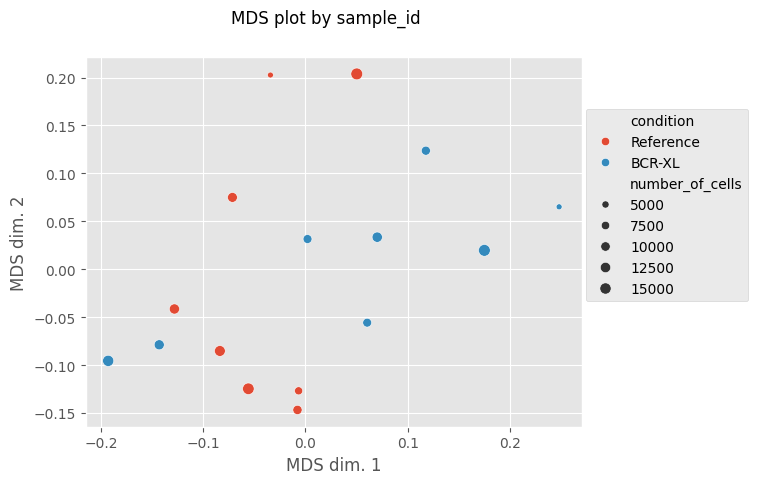

In [282]:
fig, MDS = Experiment.plot_MDS(seed = 42)
fig

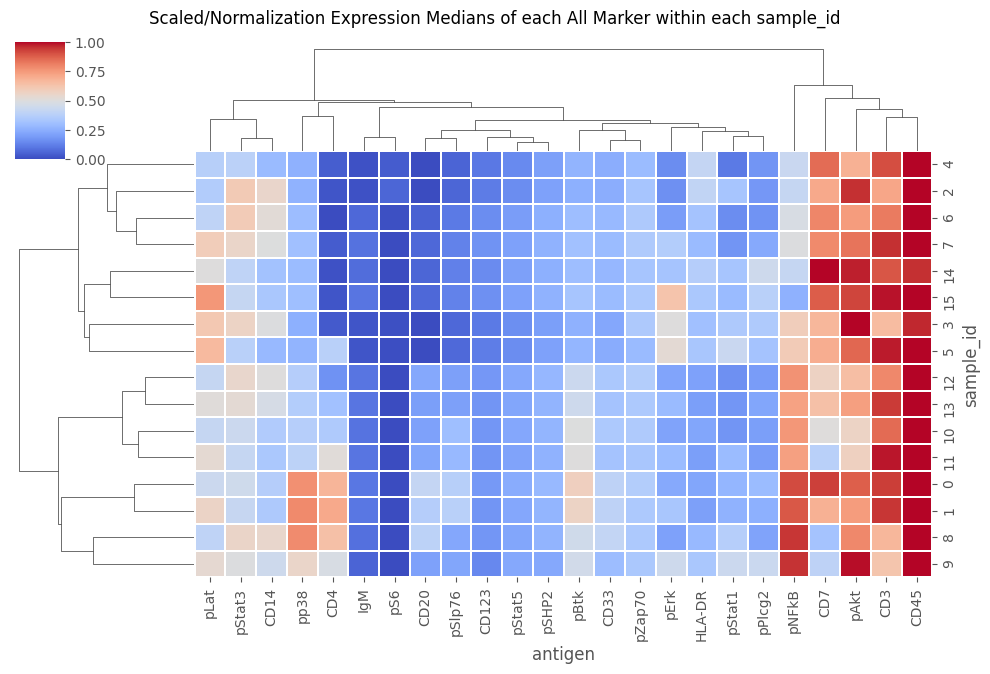

In [283]:
fig = Experiment.plot_medians_heatmap(marker_class = 'All', groupby = 'sample_id', figsize = (10,6.5))

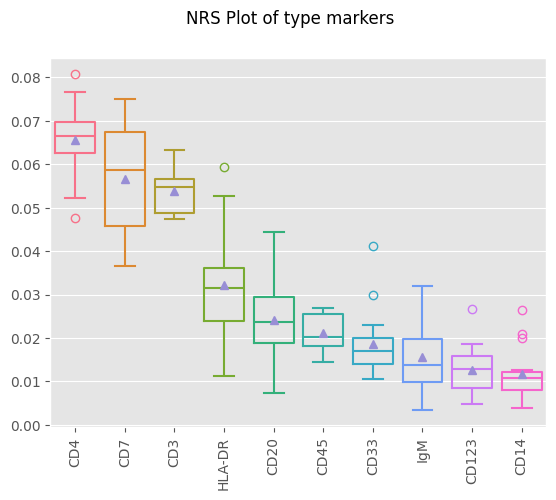

In [284]:
'''For exact replication of the CATALYST NRS figure, use the unscaled data (uncoment the line below). This perfect replication is because the NRS plot function is directly translated from CATALYST, as
CATALYST is the only package I am aware of that uses / references NRS scores.'''
#Experiment.do_scaling('unscale')
fig = Experiment.plot_NRS()
if Experiment._scaling == 'unscale':
    Experiment.do_scaling()
fig

In [285]:
Experiment.do_flowsom(n_clusters = 20, XY_dim = 10, rlen = 50, marker_class = 'type', scale_within_cells = False, seed = 1234)

2025-07-08 16:50:53.537 | DEBUG    | flowsom.main:__init__:82 - Reading input.
2025-07-08 16:50:53.561 | DEBUG    | flowsom.main:__init__:84 - Fitting model: clustering and metaclustering.
2025-07-08 16:52:00.425 | DEBUG    | flowsom.main:__init__:86 - Updating derived values.


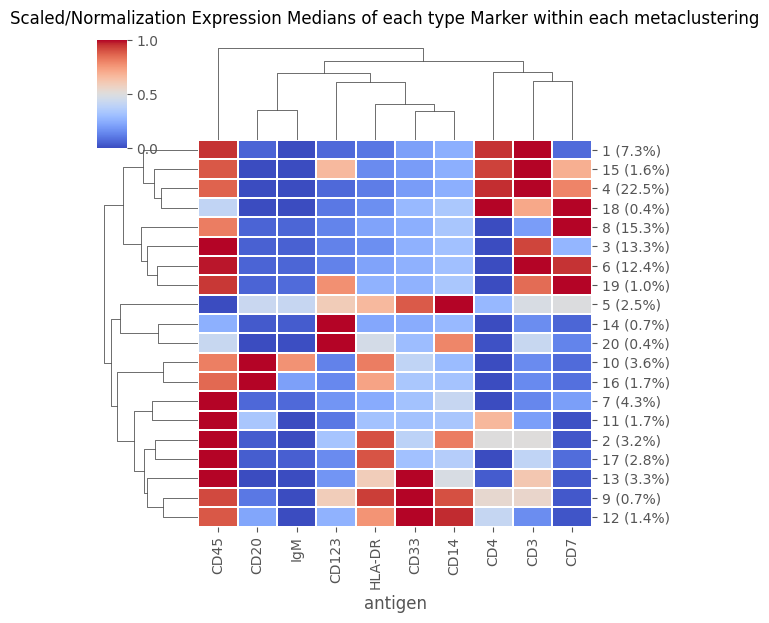

In [286]:
fig = Experiment.plot_medians_heatmap(marker_class = 'type', groupby = 'metaclustering', figsize = (6,6))

In [287]:
cell_types = ['Monocyte','other','NK cells','DC', 'B-cell IgMplus', 'B-cell IgMminus','CD8 T-cells', 'CD4 T-cells']
annotations = {
    1:'CD4 T-cells',2:'Monocyte',3:'CD8 T-cells',4:'CD4 T-cells',5:'other',
    6:'CD8 T-cells',7:'NK cells',8:'NK cells',9:'Monocyte',10:'B-cell IgMplus',
    11:'Monocyte',12:'Monocyte',13:'Monocyte',14:'DC',15:'CD4 T-cells',
    16:'B-cell IgMminus',17:'Monocyte',18:'CD4 T-cells',19:'CD8 T-cells',20:'DC'
}

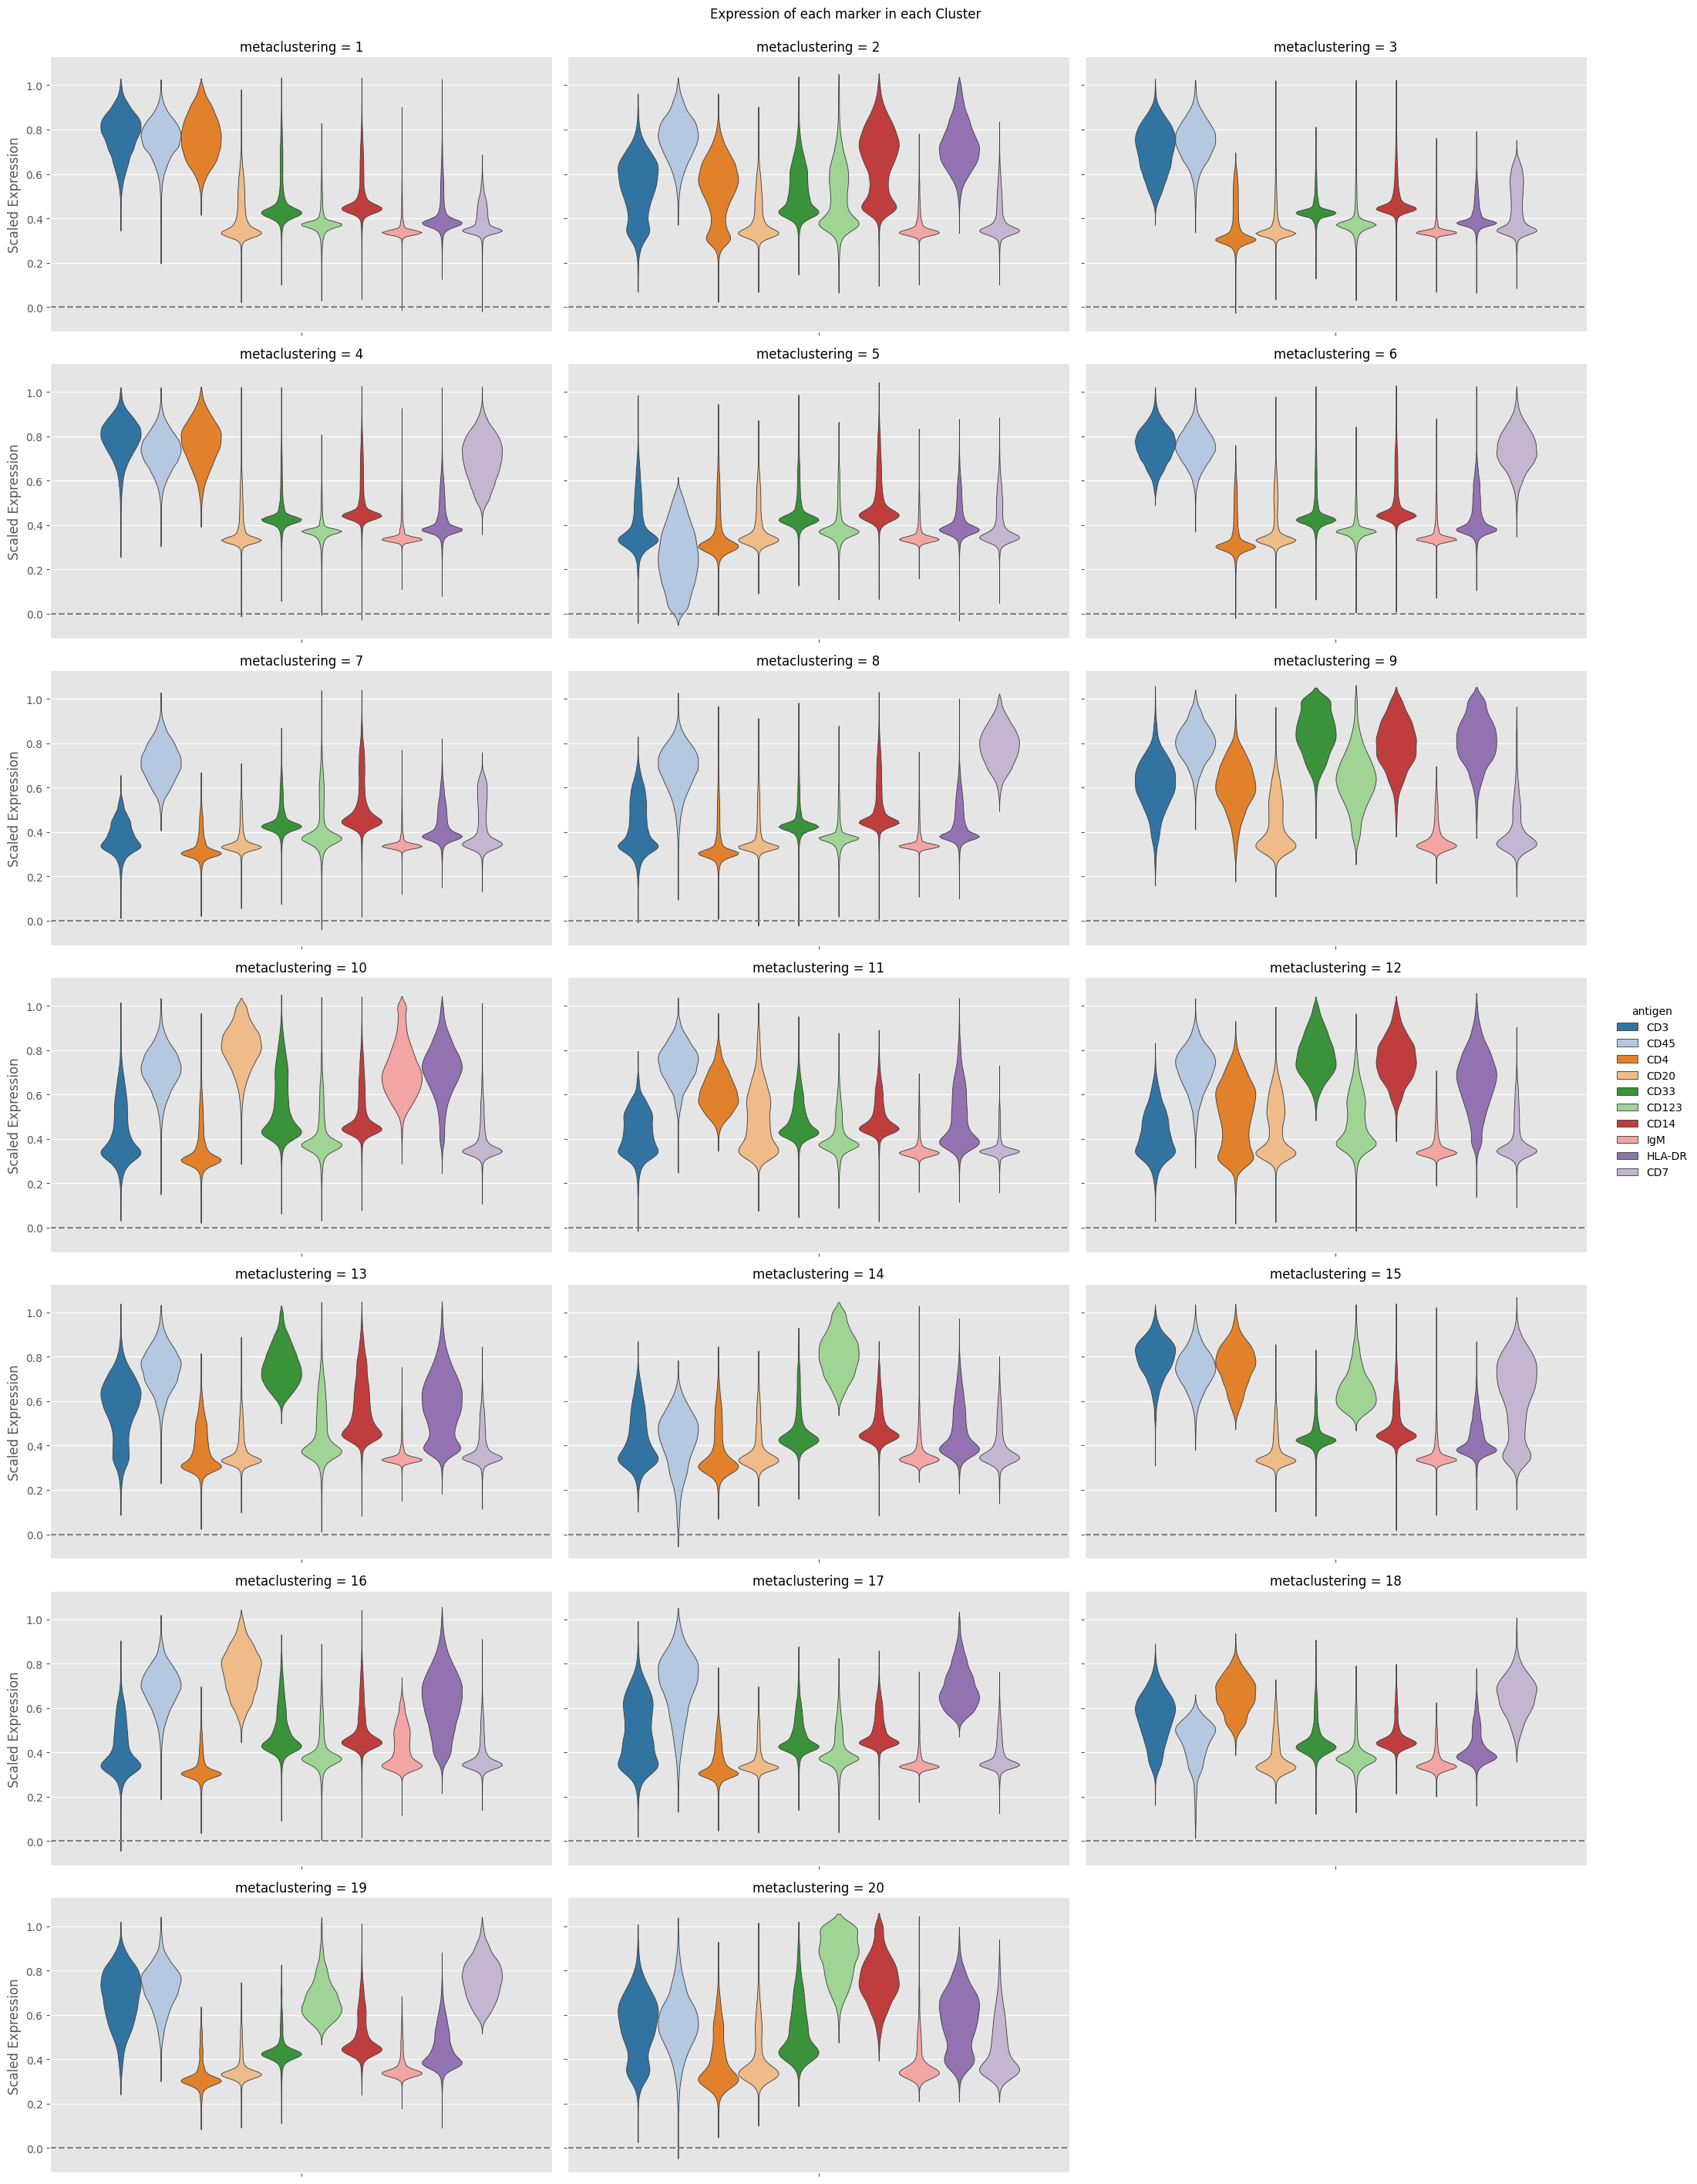

In [288]:
Experiment.plot_cluster_distributions()

In [289]:
Experiment.do_PCA(marker_class = 'type', cell_number = 1000, seed = 42)

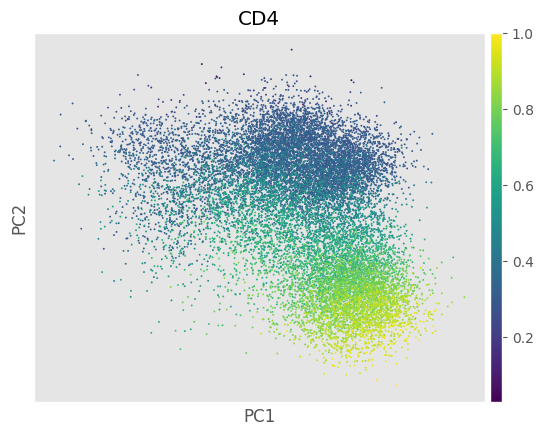

In [290]:
Experiment.plot_PCA(color_by = 'CD4')

In [291]:
Experiment.do_UMAP(marker_class = 'type', cell_number = 1000, seed = 42, n_neighbors = 15, min_dist = 0.1)

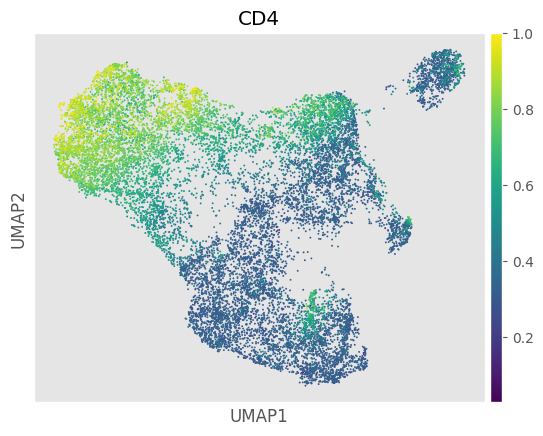

In [292]:
Experiment.plot_UMAP(color_by = 'CD4')

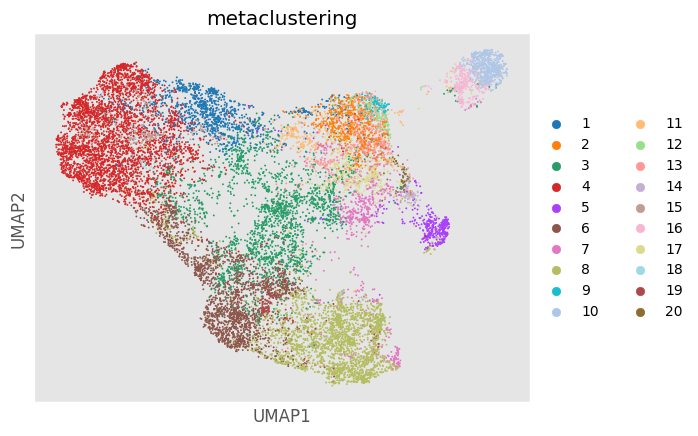

In [293]:
Experiment.plot_UMAP(color_by = 'metaclustering')

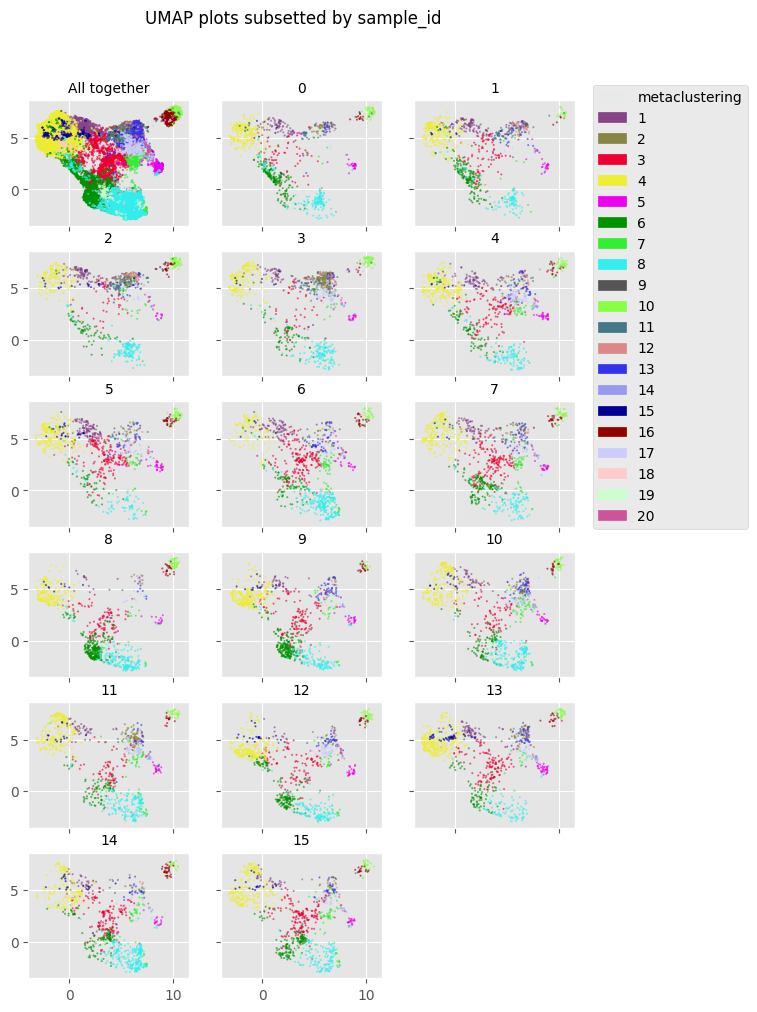

In [294]:
Experiment.plot_facetted_DR(color_by = 'metaclustering', subsetting_column = 'sample_id')

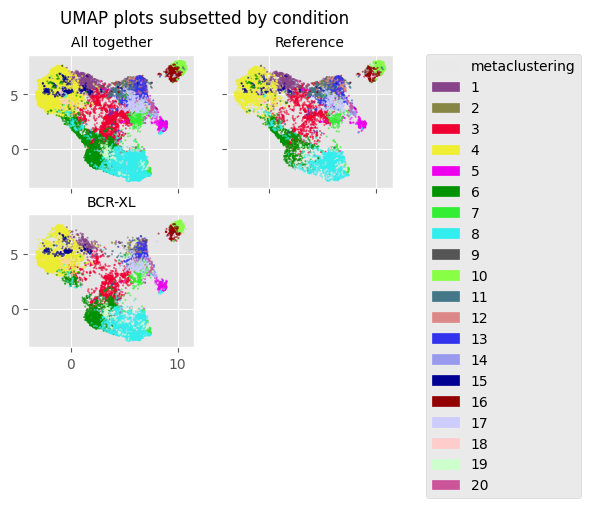

In [295]:
Experiment.plot_facetted_DR(color_by = 'metaclustering', subsetting_column = 'condition')

C:\Users\Default\Desktop\PalmettoBUG\palmettobug\Analysis_functions\Analysis.py:1776: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  down_anndata.obs[i] = down_anndata.obs[i].astype('category')


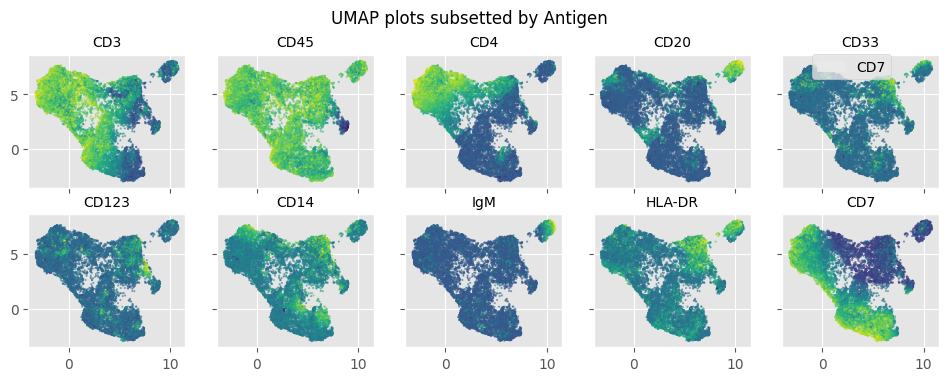

In [296]:
Experiment.plot_facetted_DR_by_antigen(marker_class = ['type'], number_of_columns = 5)

In [297]:
annotations = {
    1:'CD4 T-cells',2:'Monocyte',3:'CD8 T-cells',4:'CD4 T-cells',5:'other',
    6:'CD8 T-cells',7:'NK cells',8:'NK cells',9:'Monocyte',10:'B-cell IgMplus',
    11:'Monocyte',12:'Monocyte',13:'Monocyte',14:'DC',15:'CD4 T-cells',
    16:'B-cell IgMminus',17:'Monocyte',18:'CD4 T-cells',19:'CD8 T-cells',20:'DC'
}

# former annotation from scaling without making the data all non-negative first
'''
annotations = {
    1:'Monocyte',2:'other',3:'DC',4:'NK cells',5:'B-cell IgM+',
    6:'CD4 T-cells',7:'other',8:'CD8 T-cells',9:'CD4 T-cells',10:'CD4 T-cells',
    11:'CD8 T-cells',12:'Monocyte',13:'DC',14:'NK cells',15:'CD4 T-cells',
    16:'B-cell IgM-',17:'Monocyte',18:'CD8 T-cells',19:'Monocyte',20:'CD4 T-cells'
}
'''

Experiment.data.obs['merging'] = Experiment.data.obs['metaclustering'].astype('int').replace(annotations).astype('category')
Experiment.UMAP_embedding.obs['merging'] = Experiment.UMAP_embedding.obs['metaclustering'].astype('int').replace(annotations).astype('category')

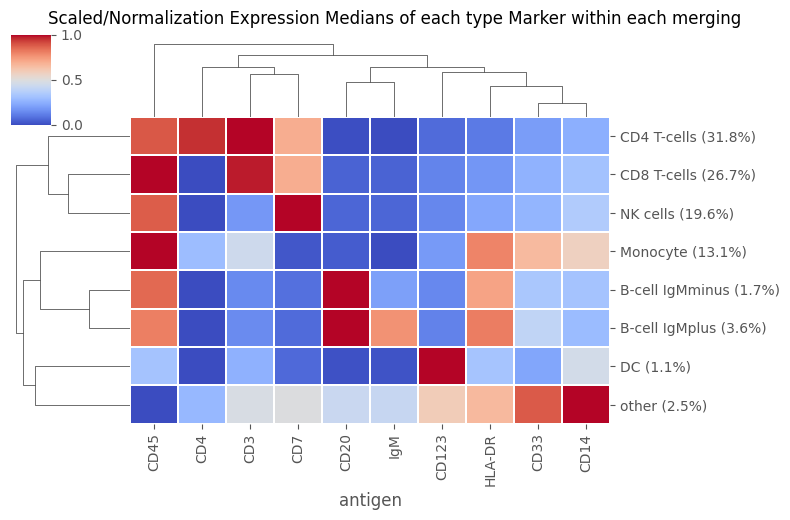

In [298]:
fig = Experiment.plot_medians_heatmap(marker_class = 'type', groupby = 'merging', figsize = (8,5))

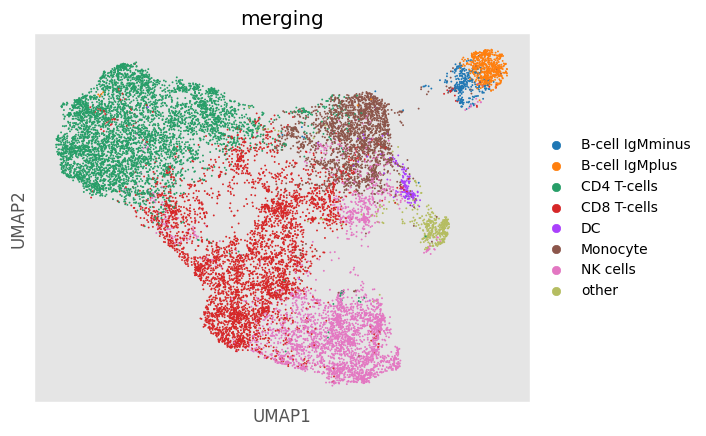

In [299]:
Experiment.plot_UMAP(color_by = 'merging')

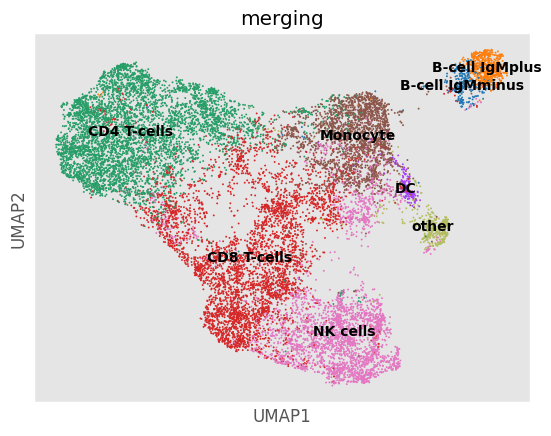

In [300]:
Experiment.plot_UMAP(color_by = 'merging', legend_loc = 'on data')

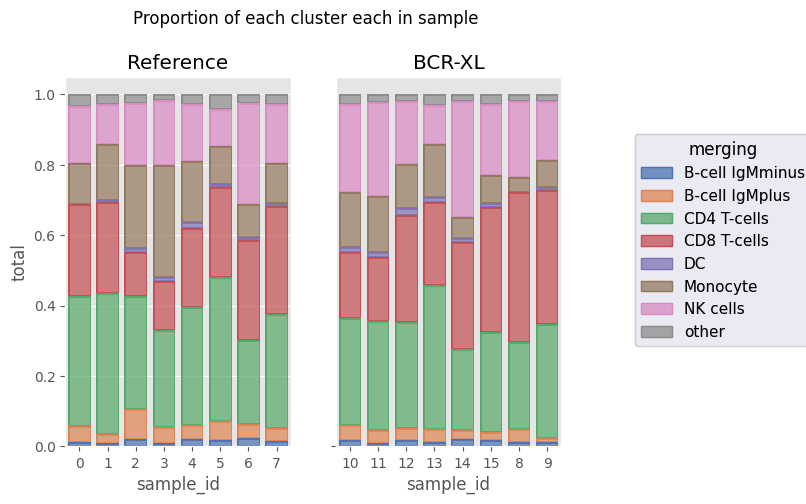

In [301]:
Experiment.plot_cluster_abundance_1(groupby_column = 'merging')

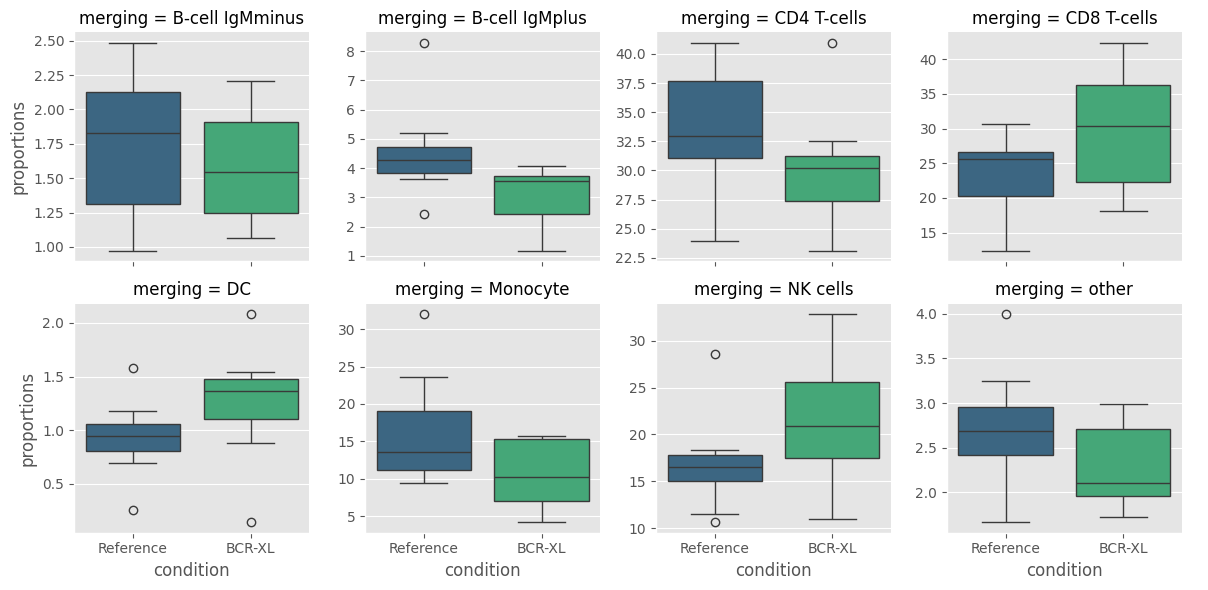

In [302]:
Experiment.plot_cluster_abundance_2(groupby_column = 'merging', plot_type = 'boxplot')

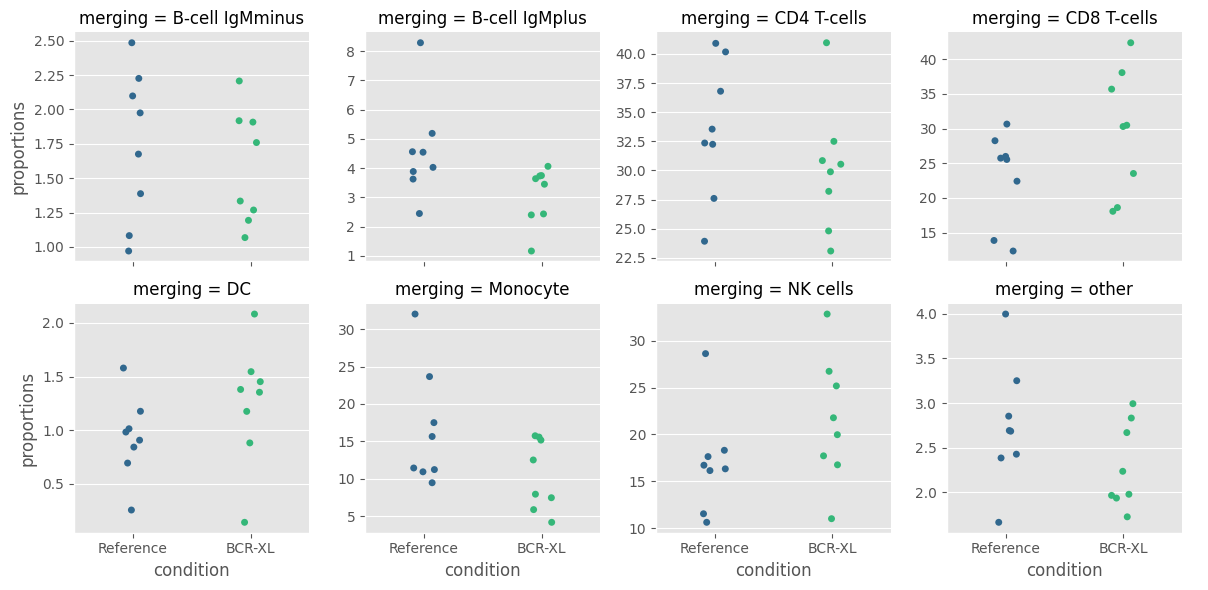

In [303]:
Experiment.plot_cluster_abundance_2(groupby_column = 'merging', plot_type = 'stripplot')

In [304]:
Experiment.do_abundance_ANOVAs()

,f statistics,p_value,p_adj,Reference mean %,Reference stdev,BCR-XL mean %,BCR-XL stdev
B-cell IgMplus,4.5860,0.05030,0.2623,4.5730,1.7050,3.082,0.9872
Monocyte,3.3720,0.08763,0.2623,16.4800,7.8250,10.540,4.7290
CD8 T-cells,2.7530,0.11930,0.2623,23.1100,6.6160,29.650,8.9780
other,2.3770,0.14540,0.2623,2.7440,0.6795,2.292,0.4747
NK cells,2.1580,0.16390,0.2623,16.9800,5.4700,21.500,6.7580
DC,1.7770,0.20380,0.2717,0.9315,0.3802,1.252,0.5635
CD4 T-cells,1.4050,0.25560,0.2921,33.4500,5.8550,30.100,5.4180
B-cell IgMminus,0.4044,0.53510,0.5351,1.7370,0.5515,1.582,0.4169


In [305]:
Experiment.do_count_GLM(variable = 'condition', conditions = ['Reference','BCR-XL'], groupby_column = 'merging', family = 'NegativeBinomial')

C:\Users\benca\miniforge3\envs\main\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


,comparison,merging,pvalue,p_adj,Reference est. avg,Reference 95% CI +/-,BCR-XL est. avg,BCR-XL 95% CI +/-
3,Reference vs. BCR-XL,B_cell_IgMplus,0.0309,0.219,4.57,0.593,3.08,0.567
2,Reference vs. BCR-XL,Monocyte,0.0547,0.219,16.5,2.72,10.5,2.47
0,Reference vs. BCR-XL,CD8_T_cells,0.116,0.219,23.1,2.6,29.6,4.72
6,Reference vs. BCR-XL,other,0.117,0.219,2.74,0.222,2.29,0.263
4,Reference vs. BCR-XL,NK_cells,0.137,0.219,17.0,1.91,21.5,3.43
1,Reference vs. BCR-XL,CD4_T_cells,0.237,0.316,33.4,2.1,30.1,2.68
5,Reference vs. BCR-XL,DC,0.299,0.342,0.934,0.189,1.25,0.362
7,Reference vs. BCR-XL,B_cell_IgMminus,0.536,0.536,1.74,0.186,1.58,0.241


In [306]:
df = Experiment.do_state_exprs_ANOVAs()
df.head(25)

,antigen,merging,p_value,p_adj,F statistic,avg Reference mean exprs,Reference avg stdev,avg BCR-XL mean exprs,BCR-XL avg stdev
48,pS6,B-cell IgMminus,6.161000e-12,6.900000e-10,434.20,0.3947,0.022320,0.7099,0.036500
49,pS6,B-cell IgMplus,1.830000e-11,1.025000e-09,369.80,0.4819,0.026980,0.7365,0.025970
10,pBtk,CD4 T-cells,3.264000e-08,1.219000e-06,118.30,0.5519,0.013560,0.4763,0.014250
15,pBtk,other,2.072000e-07,5.802000e-06,87.84,0.5651,0.015160,0.4862,0.018370
66,pSlp76,CD4 T-cells,2.925000e-07,6.552000e-06,83.00,0.4559,0.021040,0.3818,0.009314
71,pSlp76,other,4.016000e-07,7.497000e-06,78.75,0.4722,0.022600,0.3929,0.011360
53,pS6,Monocyte,6.971000e-07,9.968000e-06,71.80,0.3597,0.029780,0.5118,0.041110
41,pPlcg2,B-cell IgMplus,7.120000e-07,9.968000e-06,71.54,0.4605,0.024550,0.5936,0.037130
14,pBtk,NK cells,1.031000e-06,1.283000e-05,67.19,0.5535,0.019260,0.4801,0.016460
11,pBtk,CD8 T-cells,1.816000e-06,2.034000e-05,60.96,0.5433,0.021000,0.4712,0.015470
